# CLUSTERING MADRID: WHERE TO OPEN A NEW RESTAURANT

### 1. Problem Description

In this project, the problem attempted to solve will be to find the best possible location or the most optimal, for a new restaurant in the city of Madrid, Spain. To achieve this task, an analytical approach will be used, based on advanced machine learning techniques and data analysis, concretely clustering and perhaps some data visualization techniques.

During the process of analysis, several data transformations will be performed, in order the find the best possible data format for the machine learning model to ingest. Once the data is set up and prepared, a modeling process will be carried out, and this statistical analysis will provide the best possible places to locate a new bussies in the city of Madrid.

### 2. Importing libraries

First of all, lets get the libraries that we will use to solve the problem below.

In [17]:
#IMPORTAR LIBRERIAS
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 


from pandas.io.json import json_normalize 


import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

import wget
import requests

from math import sqrt, pi

print('Libraries imported.')


Libraries imported.


### 3. Data aquisition


The data that will be used to develop this project is based on two sites:

1. The Foursquare Api: This data will be accesed via Python, and used to obtain the most common venues per neighborhood in the city of Madrid. This way, it is possible to have a taste of how the city's venues are distributed, what are the most common places for leisure, and in general, it will provide an idea of what people's likes are.

2. The Madrid City Hall's Web Portal: This site provides several data sources of great utility to solve this problem. The files are provided in Excel format, and they are built over a statstical exploitation and use basis. In this case we will use the dsitricts location data and boundaries.
You can access the data by clicking this link:
'https://www.madrid.es/portales/munimadrid/es/Inicio/El-Ayuntamiento/Estadistica/Distritos-en-cifras/Distritos-en-cifras-Informacion-de-Distritos-/?vgnextfmt=default&vgnextoid=74b33ece5284c310VgnVCM1000000b205a0aRCRD&vgnextchannel=27002d05cb71b310VgnVCM1000000b205a0aRCRD'



In [2]:
distritos_df = pd.read_csv('C:/Users/NITROPC/Desktop/DATA SCIENCE/CERTIFICACION IBM/09 - PROYECTO FINAL/04 - CAPSTONE/DATA/distritos.csv', sep = ';')

Let´s see what´s in the dataframe.

In [3]:
distritos_df


,OBJECTID,Shape_Leng,Shape_Area,COD_DIS,COD_DIS_TX,DISTRI_MAY,NOMBRE,DISTRI_MT
0,11,"10304,07973","5228246,741",1,1,CENTRO,Centro,CENTRO
1,6,"12806,76426","6462175,63",2,2,ARGANZUELA,Arganzuela,ARGANZUELA
2,9,"9523,885329","5466211,164",3,3,RETIRO,Retiro,RETIRO
3,12,"10866,33577","5392403,428",4,4,SALAMANCA,Salamanca,SALAMANCA
4,17,"13396,81708","9175481,878",5,5,CHAMARTIN,Chamart�n,CHAMART�N
5,15,"9919,059595","5374724,446",6,6,TETUAN,Tetu�n,TETU�N
6,13,"9019,542776","4679185,047",7,7,CHAMBERI,Chamber�,CHAMBER�
7,21,"94482,14556","237838370,4",8,8,FUENCARRAL - EL PARDO,Fuencarral - El Pardo,FUENCARRAL - EL PARDO
8,16,"41034,34336","46531136,2",9,9,MONCLOA - ARAVACA,Moncloa - Aravaca,MONCLOA - ARAVACA
9,7,"28181,05527","25427202,6",10,10,LATINA,Latina,LATINA


There are a couple of columns that we will not need to solve our ploblem. So let´s clean our dataframe.

In [4]:
distritos_df = distritos_df.drop(['OBJECTID', 'Shape_Leng', 'COD_DIS_TX', 'DISTRI_MAY', 'DISTRI_MT'], axis = 1)
distritos_df = distritos_df.rename(columns = {'Shape_Area' : 'area', 'COD_DIS' : 'cod', 'NOMBRE' : 'District'})


In [5]:
distritos_df = distritos_df.reindex(columns = ['cod', 'District', 'area'])
distritos_df

,cod,District,area
0,1,Centro,"5228246,741"
1,2,Arganzuela,"6462175,63"
2,3,Retiro,"5466211,164"
3,4,Salamanca,"5392403,428"
4,5,Chamart�n,"9175481,878"
5,6,Tetu�n,"5374724,446"
6,7,Chamber�,"4679185,047"
7,8,Fuencarral - El Pardo,"237838370,4"
8,9,Moncloa - Aravaca,"46531136,2"
9,10,Latina,"25427202,6"


In [6]:
distritos_df['area'] = [float(x.replace(',','.')) for x in distritos_df['area']]


In [7]:
distritos_df['Area_km2'] = round(distritos_df['area']/1000000, 2)
distritos_df.drop('area', axis =1, inplace = True)
distritos_df

,cod,District,Area_km2
0,1,Centro,5.23
1,2,Arganzuela,6.46
2,3,Retiro,5.47
3,4,Salamanca,5.39
4,5,Chamart�n,9.18
5,6,Tetu�n,5.37
6,7,Chamber�,4.68
7,8,Fuencarral - El Pardo,237.84
8,9,Moncloa - Aravaca,46.53
9,10,Latina,25.43


Now we can see that there are some districts with a wrong name. Let´s name them in the correct way.

In [8]:
distritos_df['District'].iloc[[4]] = 'Chamartin'
distritos_df['District'].iloc[[5]] = 'Tetuan'
distritos_df['District'].iloc[[6]] = 'Chamberi'
distritos_df['District'].iloc[[18]] = 'Vicalvaro'

C:\Users\NITROPC\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Now, we need to create a data frame with the coordinates of each district.

In [9]:
coordinates_df = pd.DataFrame( data = {

'District' : ['Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartin',
                'Tetuán', 'Chamberí', 'Fuencarral-El Pardo', 'Moncloa-Aravaca', 'Latina', 'Carabanchel',
                'Usera', 'Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde',
                'Villa de Vallecas', 'Vicálvaro', 'San Blas-Canillejas', 'Barajas'],
'Latitude' : ['40.415347', '40.3960833', '40.408072', '40.43', '40.453333', '40.460556', '40.432792', '40.478611', '40.4565887',
                 '40.402461', '40.383669', '40.381336', '40.386548', '40.409869', '40.4373649', '40.469457', '40.345925', '40.3717661', 
                 '40.4042', '40.426001', '40.470196'],
'Longitude' : ['-3.707371', '-3.6938472', '-3.676729', '-3.677778', '-3.6775', '-3.7', '-3.697186', '-3.709722', '-3.7544059', 
                  '-3.741294', '-3.727989', '-3.706856', '-3.6635396', '-3.644436', '-3.6499612', '-3.640482', '-3.709356', '-3.620269', 
                  '-3.60806', '-3.612764', '-3.58489']})

The next step is to concatenate our district dataframe with the coordinates dataframe, et volia:

In [10]:
distritos_df = pd.concat([distritos_df, coordinates_df[['Latitude', 'Longitude']]], axis = 1)

In [11]:
distritos_df

,cod,District,Area_km2,Latitude,Longitude
0,1,Centro,5.23,40.415347,-3.707371
1,2,Arganzuela,6.46,40.3960833,-3.6938472
2,3,Retiro,5.47,40.408072,-3.676729
3,4,Salamanca,5.39,40.43,-3.677778
4,5,Chamartin,9.18,40.453333,-3.6775
5,6,Tetuan,5.37,40.460556,-3.7
6,7,Chamberi,4.68,40.432792,-3.697186
7,8,Fuencarral - El Pardo,237.84,40.478611,-3.709722
8,9,Moncloa - Aravaca,46.53,40.4565887,-3.7544059
9,10,Latina,25.43,40.402461,-3.741294


In [12]:
distritos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cod        21 non-null     int64  
 1   District   21 non-null     object 
 2   Area_km2   21 non-null     float64
 3   Latitude   21 non-null     object 
 4   Longitude  21 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 968.0+ bytes


Some of the data are in a wrong format, so let´s put them in the right way.

In [13]:
distritos_df['Latitude'] = distritos_df['Latitude'].astype('float', errors = 'ignore')
distritos_df['Longitude'] = distritos_df['Longitude'].astype('float', errors = 'ignore')
distritos_df.dtypes

cod            int64
District      object
Area_km2     float64
Latitude     float64
Longitude    float64
dtype: object

### 4. SCRAPPING THE WEB

Now it´s time to get  each district venues by using the FourSquare API. 

In [14]:
#getting venues
CLIENT_ID = 'FRYWC2MDRQY302XEHS1Q40MFONKCG52JZOK1CIET233QUMD3' 
CLIENT_SECRET = 'LFFQRNFRCEH4VZYAE2NNV4RAF11WLZEZWDGCF1AN0L44ARDV' 
VERSION = '20210601' 
LIMIT = 100 


In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius = 700):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [19]:
madrid_venues=getNearbyVenues(names=distritos_df['District'], latitudes=distritos_df['Latitude'],longitudes=distritos_df['Longitude']
                             )

In [20]:
print(madrid_venues.shape)
madrid_venues.head()

(1008, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Centro,40.415347,-3.707371,Plaza Mayor,40.415527,-3.707506,Plaza
1,Centro,40.415347,-3.707371,Mercado de San Miguel,40.415443,-3.708943,Market
2,Centro,40.415347,-3.707371,The Hat Madrid,40.414343,-3.707120,Hotel
3,Centro,40.415347,-3.707371,La Taberna de Mister Pinkleton,40.414536,-3.708108,Other Nightlife
4,Centro,40.415347,-3.707371,Zen Zoo,40.416263,-3.707174,Smoothie Shop


In [21]:
print("Number of unique venue categories in Madrid districts:{}".format(len(madrid_venues["Venue Category"].unique())))

Number of unique venue categories in Madrid districts:178


Because of the radius overlaping between districs, some venues may be duplicated. So let´s eliminate those venues from our dataframe.

In [23]:
# Dropping duplicated venues from the dataframe
venues_deduplicated = madrid_venues.drop_duplicates(subset='Venue')
print('Number of duplicated venues removed {}'.format(madrid_venues.shape[0]-venues_deduplicated.shape[0]))

Number of duplicated venues removed 82


### 5. ANALIZING DISTRICT VENUES

Let´s analize a little bit our distric venues. For that, we will make a onehot dataframe by using the get_dummies function.

In [24]:
madrid_onehot = pd.get_dummies(venues_deduplicated[['Venue Category']], prefix = '', prefix_sep = '')

madrid_onehot['District'] = venues_deduplicated['District']

fixed_columns = [madrid_onehot.columns[-1]] + list(madrid_onehot.columns[:-1])
madrid_onehot = madrid_onehot[fixed_columns]

madrid_onehot.tail()

,District,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Business Service,Butcher,Café,Candy Store,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Opera House,Optical Shop,Other Nightlife,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Student Center,Supermarket,Sushi Restaurant,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trade School,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
1003,Barajas,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1004,Barajas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1005,Barajas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1006,Barajas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Now, let´s group the districts with the number of each venue category.

In [25]:
madrid_grouped = madrid_onehot.groupby('District').sum().reset_index()

In [26]:
madrid_grouped

,District,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Business Service,Butcher,Café,Candy Store,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Opera House,Optical Shop,Other Nightlife,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Student Center,Supermarket,Sushi Restaurant,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trade School,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Arganzuela,0,2,2,1,0,0,0,1,4,2,0,0,3,0,0,0,0,0,0,1,0,0,1,0,0,0,2,0,0,2,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,2,0,0,2,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,1,3,0,0,1,1,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,7,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0
1,Barajas,0,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Carabanchel,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Centro,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,3,0,0,1,0,0,1,0,0,0,1,1,1,0,1,2,0,1,3,0,0,0,0,1,1,1,0,0,1,1,0,2,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,1,1,5,7,0,2,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,3,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,2,0,0,0,0,0,1,0,0,10,0,0,0,0,1,0,0,2,1,0,0,0,0,1,0,0,0,1,0,0,0,0,12,0,0,0,0,0,5,0,0,1,0,0,0,0,

Let´s get the top 5 venues by district.

In [27]:
#top 5 venues by district

num_top_venues = 5

for district in madrid_grouped['District']:
    print("----"+district+"----")
    temp = madrid_grouped[madrid_grouped['District'] == district].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arganzuela----
                venue  freq
0    Tapas Restaurant   7.0
1  Spanish Restaurant   6.0
2              Bakery   4.0
3          Restaurant   4.0
4         Beer Garden   3.0


----Barajas----
                venue  freq
0               Hotel   8.0
1  Spanish Restaurant   5.0
2          Restaurant   3.0
3         Coffee Shop   3.0
4    Tapas Restaurant   2.0


----Carabanchel----
              venue  freq
0             Plaza   2.0
1     Metro Station   2.0
2            Bakery   2.0
3  Kebab Restaurant   1.0
4              Café   1.0


----Centro----
                venue  freq
0  Spanish Restaurant  12.0
1               Plaza  10.0
2               Hotel   7.0
3              Hostel   5.0
4    Tapas Restaurant   5.0


----Chamartin----
                 venue  freq
0           Restaurant  10.0
1   Spanish Restaurant  10.0
2     Tapas Restaurant   4.0
3  Japanese Restaurant   3.0
4          Pizza Place   3.0


----Chamberi----
                venue  freq
0          Restaurant  

And now, let´s get the top 10 venue categoriesin all districts combined and plot them in a barplot.

In [28]:
# Getting the top 10 venue categories in all districts combined
venue_count = venues_deduplicated[['District', 'Venue Category']].groupby('Venue Category').count()
venue_top10 = venue_count.sort_values(by='District', ascending=False).rename(columns={'District':'Count'}).head(10)
venue_top10.reset_index(drop=False, inplace=True)
venue_top10

,Venue Category,Count
0,Spanish Restaurant,111
1,Restaurant,58
2,Tapas Restaurant,43
3,Bar,39
4,Plaza,34
5,Hotel,28
6,Coffee Shop,21
7,Café,21
8,Bakery,18
9,Park,17


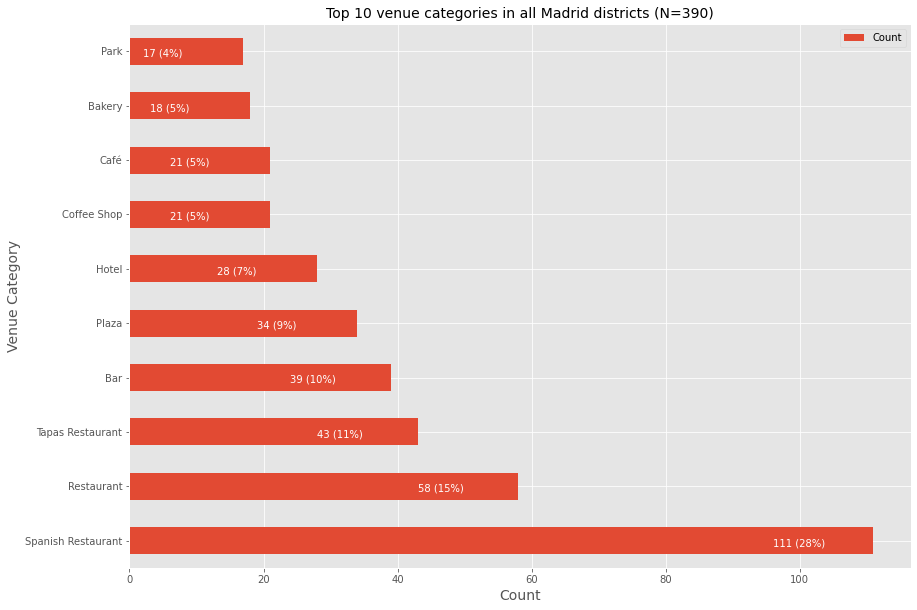

In [29]:
# Plotting bar chart
plt.style.use('ggplot')
venue_top10.plot(kind='barh', x='Venue Category', y='Count', figsize=(14,10))
plt.xlabel('Count', fontsize=14)
plt.ylabel('Venue Category', fontsize=14)
plt.title(f'Top 10 venue categories in all Madrid districts (N={venue_top10.Count.sum()})', fontsize=14)

for index, count in zip (venue_top10.index, venue_top10.Count):
    plt.annotate(f'{count} ({round(count/venue_top10.Count.sum()*100)}%)', xy=(count - 15, index-0.1), color="white")

plt.show()

As we can see, most of the venues are related with restoration: restaurant, bar, tapas bar, etc.

Now it´s time to order our district venues in descending order.

In [30]:
#sort venues in descendign order

def most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venues'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venues'.format(ind+1))

district_venues_sorted = pd.DataFrame(columns = columns)
district_venues_sorted['District'] = madrid_grouped['District']

for ind in np.arange(madrid_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = most_common_venues(madrid_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted

,District,1st Most Common Venues,2nd Most Common Venues,3rd Most Common Venues,4th Most Common Venues,5th Most Common Venues,6th Most Common Venues,7th Most Common Venues,8th Most Common Venues,9th Most Common Venues,10th Most Common Venues
0,Arganzuela,Tapas Restaurant,Spanish Restaurant,Bakery,Restaurant,Beer Garden,Plaza,Chinese Restaurant,Argentinian Restaurant,Café,Gym / Fitness Center
1,Barajas,Hotel,Spanish Restaurant,Restaurant,Coffee Shop,Tapas Restaurant,Argentinian Restaurant,Supermarket,Hostel,Himalayan Restaurant,Grocery Store
2,Carabanchel,Plaza,Metro Station,Bakery,Kebab Restaurant,Café,Colombian Restaurant,Burger Joint,Tapas Restaurant,Soccer Field,Gym / Fitness Center
3,Centro,Spanish Restaurant,Plaza,Hotel,Hostel,Tapas Restaurant,Mexican Restaurant,Coffee Shop,Bookstore,Ice Cream Shop,Historic Site
4,Chamartin,Restaurant,Spanish Restaurant,Tapas Restaurant,Japanese Restaurant,Pizza Place,Gastropub,Plaza,Bar,Café,Mediterranean Restaurant
5,Chamberi,Restaurant,Bar,Hotel,Spanish Restaurant,Tapas Restaurant,Plaza,Coffee Shop,Café,Japanese Restaurant,American Restaurant
6,Ciudad Lineal,Spanish Restaurant,Restaurant,Tapas Restaurant,Bar,Clothing Store,Park,Plaza,Bakery,Korean Restaurant,Gym
7,Fuencarral - El Pardo,Spanish Restaurant,Italian Restaurant,Metro Station,Gym / Fitness Center,Clothing Store,Comic Shop,Burger Joint,Park,Tapas Restaurant,Pharmacy
8,Hortaleza,Spanish Restaurant,Plaza,Breakfast Spot,Restaurant,Park,Soccer Field,Café,Pizza Place,Comic Shop,Gym
9,Latina,Lake,Tapas Restaurant,Metro Station,Gym,Restaurant,Student Center,Park,Train Station,Scenic Lookout,Fast Food Restaurant


### 6. GETTING CLUSTERS


#### 6.1. KMEANS
Now, it´s time to clustering. We will use the Kmeans function from SciKiLearn library. First, we will get our optimal k by analizing the score of KMeans.
    

In [ ]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

C:\Users\NITROPC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


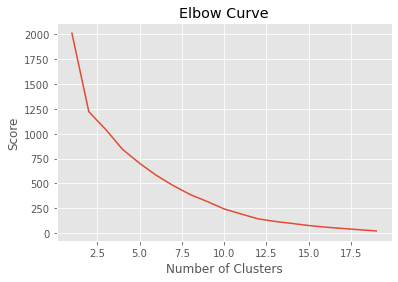

In [46]:
#optimal_k

madrid_grouped_clustering = madrid_grouped.drop('District', 1)

plt.style.use('ggplot')
inertia = []
Nc = range(1, 20)
for num_clusters in Nc:
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(madrid_grouped_clustering )
    inertia.append(kmeans.inertia_)


plt.plot(Nc,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()





In [47]:
#optimal k = 5

kclusters = 3

kmeans = KMeans(n_clusters=kclusters, random_state = 0).fit(madrid_grouped_clustering)
kmeans.labels_[0:10]

array([1, 0, 0, 2, 1, 1, 1, 0, 0, 0])

#### 6.2. AGGLOMERATIVE CLUSTERING

Let´s take a look to what agglomerative clustering can do with our data.

In [41]:
for linkage in ['complete', 'ward']:
    ag = AgglomerativeClustering( linkage=linkage, compute_full_tree=True)
    ag = ag.fit(madrid_grouped_clustering)
   

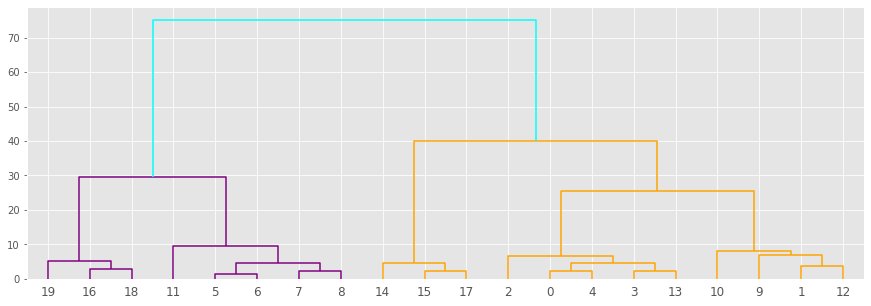

In [49]:
Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))


hierarchy.set_link_color_palette(['purple', 'orange'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='cyan')

### 7. RESULTS

Both kmeans and agglomerative clustering achieve nearly the same result. 

As a recommendation, it must be said in a study of this size, to make good 
predictions about where to open a certain business or shop, more data is 
needed. For example, socio-demographic data about the population, like their 
income level, if they have children or not, the education level, what kind of job 
do they make a living from, etc.… Also, one of the most important data to 
examine carefully are the data related to the people’s likes and tastes about 
how they prefer to spend their leisure time, what kinds of food do they like, or 
what are their hobbies. With all these data gathered, a more in depth analysis 
could be performed, and the segmentations would be more accurate. For this 
project, these data weren’t available, and was also out of the project’s scope.